In [40]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [41]:
usa=pd.read_csv('USA_Housing.csv')

In [42]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [43]:
usa.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


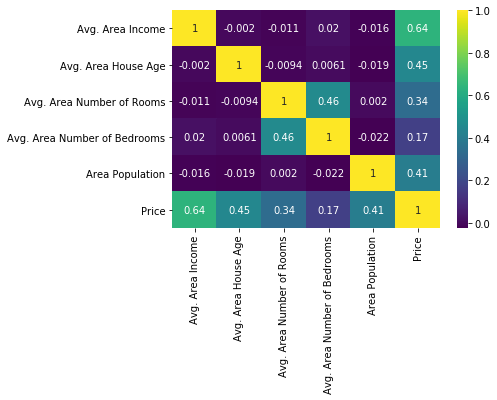

In [44]:
sb.heatmap(usa.corr(),annot=True,cmap="viridis")

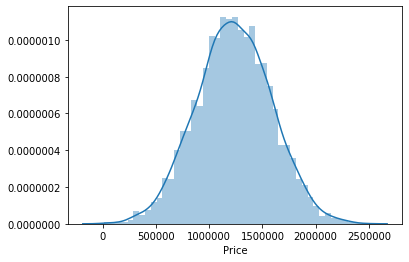

In [45]:
sb.distplot(usa['Price'])

In [46]:
usa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [47]:
X=usa[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=usa['Price']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
usa_aitm=LinearRegression()

In [52]:
usa_aitm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
usa_aitm.coef_

array([2.15898874e+01, 1.66102501e+05, 1.19895936e+05, 1.90107101e+03,
       1.52315025e+01])

In [54]:
usa_aitm.intercept_

-2638142.1104277316

In [55]:
pd.DataFrame(usa_aitm.coef_,index=X.columns,columns=['my coef'])

,my coef
Avg. Area Income,21.589887
Avg. Area House Age,166102.501246
Avg. Area Number of Rooms,119895.936402
Avg. Area Number of Bedrooms,1901.071012
Area Population,15.231503


In [56]:
pred=usa_aitm.predict(X_test)

In [57]:
pred

array([1310035.96931535, 1238811.85458502, 1245265.83079177, ...,
       1024496.94962154, 1548581.80349694, 1032639.16178958])

In [58]:
usa_aitm.predict([[100000,15,150,300,500000]])

array([28182847.16581414])

In [59]:
from sklearn import metrics

In [60]:
metrics.mean_absolute_error(y_test,pred)

80893.8119076974

In [61]:
metrics.mean_squared_error(y_test,pred)

10013679978.58189